<a href="https://colab.research.google.com/github/DelRosal/DelRosal/blob/main/PredictionPoetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRARIES
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#DOWNLOAD DATASET
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

data=open("./irish-lyrics-eof.txt").read()

corpus=data.lower().split("\n")

print(corpus)

--2022-07-19 04:00:52--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.1’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0s      

2022-07-19 04:00:52 (132 MB/s) - ‘irish-lyrics-eof.txt.1’ saved [68970/68970]

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then c

In [ ]:
#TOKENIZER

tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

print(f"Word Index Dictionary: {tokenizer.word_index}")
print(f"Total Words: {total_words}")

Word Index Dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'thro

In [ ]:
#PREPROCESSING DATA

input_seq=[]

for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]

  for num in range (1,len(token_list)):
    n_gram_seq=token_list[:num+1]
    input_seq.append(n_gram_seq)

maxlen=max([len(x) for x in input_seq])

#Padding
input_seq=np.array(pad_sequences(input_seq,maxlen=maxlen,padding="pre"))

#Create Inputs

xs, labels= input_seq[:,:-1],input_seq[:,-1]

#Define Outputs

ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [ ]:
#SAMPLE SENTENCE

sentence=corpus[0].split()
token_list=[]

for word in sentence:
  token_list.append(tokenizer.word_index[word])

print(f"Sample Sentence: {sentence}")
print(f"Tokens: {token_list}")

#Showing subset[:-1]

num=5
print(f"Token List of subset: {xs[num]}")
print(f"Decoded to Text: {tokenizer.sequences_to_texts([xs[num]])}")

print(f"Index of Label: {np.argmax(ys[num])}")
print(f"Position of Label: {ys[num]}")

Sample Sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
Tokens: [51, 12, 96, 1217, 48, 2, 69]
Token List of subset: [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
Decoded to Text: ['come all ye maidens young and']
Index of Label: 69
Position of Label: [0. 0. 0. ... 0. 0. 0.]


In [ ]:
#CREATE MODEL

embedding=100
lstm=100
lr=0.01

model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(total_words,embedding,input_length=maxlen-1),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm)),
                           tf.keras.layers.Dense(total_words, activation="softmax")])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2690)              540690    
                                                                 
Total params: 970,490
Trainable params: 970,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#TRAIN MODEL
history=model.fit(xs,ys,epochs=100)

Epoch 1/100
377/377 [==============================] - 19s 41ms/step - loss: 6.6434 - accuracy: 0.0753
Epoch 2/100
377/377 [==============================] - 16s 42ms/step - loss: 5.7891 - accuracy: 0.1103
Epoch 3/100
377/377 [==============================] - 16s 42ms/step - loss: 5.0033 - accuracy: 0.1589
Epoch 4/100
377/377 [==============================] - 16s 42ms/step - loss: 4.1586 - accuracy: 0.2215
Epoch 5/100
377/377 [==============================] - 17s 44ms/step - loss: 3.3903 - accuracy: 0.3056
Epoch 6/100
377/377 [==============================] - 16s 42ms/step - loss: 2.7664 - accuracy: 0.3941
Epoch 7/100
377/377 [==============================] - 16s 42ms/step - loss: 2.2504 - accuracy: 0.4899
Epoch 8/100
377/377 [==============================] - 16s 42ms/step - loss: 1.9189 - accuracy: 0.5518
Epoch 9/100
377/377 [==============================] - 16s 42ms/step - loss: 1.6669 - accuracy: 0.6062
Epoch 10/100
377/377 [==============================] - 16s 42ms/step - l

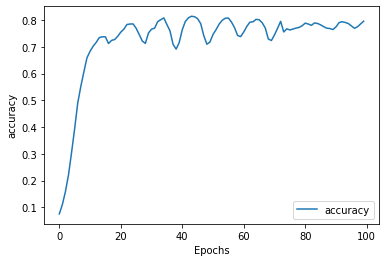

In [ ]:
#VISUALIZE RESULTS
import matplotlib.pyplot as plt

def plot_g(history,sub):
  plt.plot(history.history[sub])

  plt.xlabel("Epochs")
  plt.ylabel(sub)

  plt.legend([sub,"val_"+sub])
  plt.show()

plot_g(history,"accuracy")

In [ ]:
#GENERATING TEXT

seed="Dedicating a poem for my love"
words=50

for x in range(words):

  token_list=tokenizer.texts_to_sequences([seed])[0]
  token_list=pad_sequences([token_list],maxlen=maxlen-1, padding="pre")

  probs=model.predict(token_list)

  predicted=np.argmax(probs, axis=-1)[0]

  if predicted != 0:
    output=tokenizer.index_word[predicted]
    if (x%15==0):
      seed+=" "+output+"\n"

    else:
      seed+=" "+output

print(seed)

Dedicating a poem for my love came
 and light i his face to the town of kilkee and kilrush can be seen
 we gaily but i remember gone immortal six and cant recall i cant be seen
 like thats he wont now you mind na for daughter on some colonel farrell on
 gilgarra mountain breast for
